In [ ]:
# Installing dependencies


%pip install scikit-learn
%pip install pandas
%pip install matplotlib
%pip install numpy
%pip install nltk
%pip install seaborn

In [29]:
import nltk
import pandas as pd
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer


In [17]:
df = pd.read_csv('dataset.csv')

In [22]:
df

,feature,output
0,Here at home. Neighbors pick on my family and ...,age
1,Being bullied at school: High-achieving boys u...,age
2,There was a girl in my class in 6th grade who ...,age
3,He’s probably a white gay kid from some suburb...,age
4,You are pushed ti resorting. Treating thr bull...,age
...,...,...
47993,I don't know what I want to wear#ugh,not_cyberbullying
47994,Argh another round of instant restaurants....o...,not_cyberbullying
47995,Teacher sets up new charity to tackle anti-gay...,not_cyberbullying
47996,"I can barely tolerate Kat and Andre, Katie and...",not_cyberbullying


In [24]:
df['feature'].nunique()

46318

In [23]:
df['output'].value_counts()


output
ethnicity            8000
gender               8000
religion             8000
not_cyberbullying    8000
age                  7999
other                7999
Name: count, dtype: int64

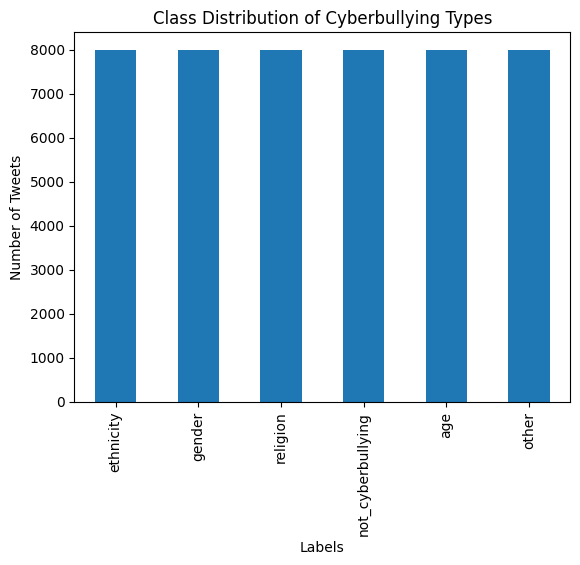

In [25]:
# Create a bar plot of the class distribution
class_counts = df['output'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Cyberbullying Types')
plt.xlabel('Labels')
plt.ylabel('Number of Tweets')
plt.show()



In [26]:
# Concatenate all tweet texts into a single string
all_text = ' '.join(df['feature'].values)
# Remove URLs, mentions, and hashtags from the text
all_text = re.sub(r'http\S+', '', all_text)
all_text = re.sub(r'@\S+', '', all_text)
all_text = re.sub(r'#\S+', '', all_text)
# Split the text into individual words
words = all_text.split()

In [28]:
# remove stop words
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

In [35]:
# Count the frequency of each word
word_counts = Counter(words)
top_words = word_counts.most_common(20)
top_words

[('I', 16017),
 ('school', 6681),
 ('like', 5249),
 ('high', 4645),
 ('dumb', 4382),
 ('bullied', 4265),
 ('RT', 4197),
 ('people', 3792),
 ('u', 3240),
 ('rape', 3019),
 ('fuck', 3014),
 ('one', 2786),
 ('bully', 2725),
 ('gay', 2683),
 ('&amp;', 2598),
 ('The', 2518),
 ('get', 2503),
 ('You', 2466),
 ('ass', 2435),
 ('girls', 2378)]

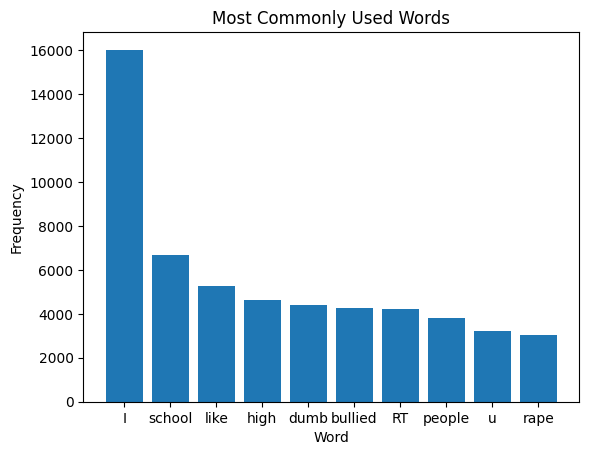

In [39]:


# Create a bar chart of the most common words
top_words = word_counts.most_common(10) # Change the number to show more/less words
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]
plt.bar(x_values, y_values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words')
plt.show()



In [40]:
# Clean the data
def clean_text(text):
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    
    # Remove URLs, mentions, and hashtags from the text
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'#\S+', '', text)
    
    # Tokenize the text
    words = nltk.word_tokenize(text)
    
    # Remove stopwords
    words = [w for w in words if w not in stopwords.words('english')]
    
    # Stem the words
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    
    # Join the words back into a string
    text = ' '.join(words)
    return text

In [42]:
from tqdm import tqdm

In [60]:
df['cleaned_feature'] = [clean_text(text) for text in tqdm(df['feature'])]


  0%|          | 0/47998 [00:00<?, ?it/s]


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\zakar/nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.496.0_x64__qbz5n2kfra8p0\\nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.496.0_x64__qbz5n2kfra8p0\\share\\nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.496.0_x64__qbz5n2kfra8p0\\lib\\nltk_data'
    - 'C:\\Users\\zakar\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [45]:
df['cleaned_feature']

KeyError: 'cleaned_feature'